In [22]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
wrld_df = pd.read_csv('world-happiness-report.csv')
wrld_df.shape

(1949, 11)

In [3]:
# display first five rows of dataframe
wrld_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
# ccheck info
wrld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [5]:
# check missing values
wrld_df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [6]:
# filling missing values with mean
cols_to_impute = ["Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom to make life choices", "Generosity","Perceptions of corruption", "Positive affect", "Negative affect"]

imputer = SimpleImputer(strategy='mean')
for col in cols_to_impute:
    wrld_df[col] = imputer.fit_transform(wrld_df[[col]])

wrld_df.isna().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [7]:
wrld_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [8]:
# dropping year column.
new_wrld = wrld_df.drop('year', axis=1)

In [9]:
# encoding the country names
countries = wrld_df['Country name']
encoder = LabelEncoder()
countries_encoded = encoder.fit_transform(countries)

In [10]:
countries_encoded = countries_encoded.reshape(-1,1)

In [11]:
countries_encoded.shape

(1949, 1)

In [12]:
# 
new_wrld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   Life Ladder                       1949 non-null   float64
 2   Log GDP per capita                1949 non-null   float64
 3   Social support                    1949 non-null   float64
 4   Healthy life expectancy at birth  1949 non-null   float64
 5   Freedom to make life choices      1949 non-null   float64
 6   Generosity                        1949 non-null   float64
 7   Perceptions of corruption         1949 non-null   float64
 8   Positive affect                   1949 non-null   float64
 9   Negative affect                   1949 non-null   float64
dtypes: float64(9), object(1)
memory usage: 152.4+ KB


In [13]:
X = new_wrld.select_dtypes(include=['float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# merging countries_encoded to X_scaled

happy_wrld = np.concatenate((X_scaled, countries_encoded), axis=1)

In [17]:
happy_wrld_df = pd.DataFrame(happy_wrld)

In [18]:
happy_wrld_df

,0,1,2,3,4,5,6,7,8,9
0,-1.562370,-1.748310,-3.062565,-1.696854,-0.174310,1.059782,0.743556,-1.803420,-0.124348,0.0
1,-0.954530,-1.599588,-2.207034,-1.642812,-0.451132,1.198649,0.567142,-1.183504,-0.372002,0.0
2,-0.635369,-1.505981,-2.317152,-1.588769,-1.011874,0.763113,-0.221207,-0.864154,0.076133,0.0
3,-1.465546,-1.529602,-2.469623,-1.545535,-1.750066,1.021910,-0.088896,-0.929903,-0.018211,0.0
4,-1.509475,-1.455241,-2.469623,-1.502301,-1.501636,1.489006,0.159185,-0.000029,-0.006418,0.0
...,...,...,...,...,...,...,...,...,...,...
1944,-1.552508,-1.211163,-0.377384,-1.210470,-0.067840,-0.600302,-0.127487,0.262965,-0.702207,165.0
1945,-1.639471,-1.183169,-0.495972,-1.129406,0.074120,-0.619238,0.021362,0.901666,-0.525312,165.0
1946,-1.659194,-1.154299,-0.318090,-1.048343,0.145100,-0.429875,0.534064,-0.000029,-0.666828,165.0
1947,-2.485786,-1.240907,-0.453619,-0.967279,-0.784738,-0.404626,0.462396,0.056327,-0.395588,165.0


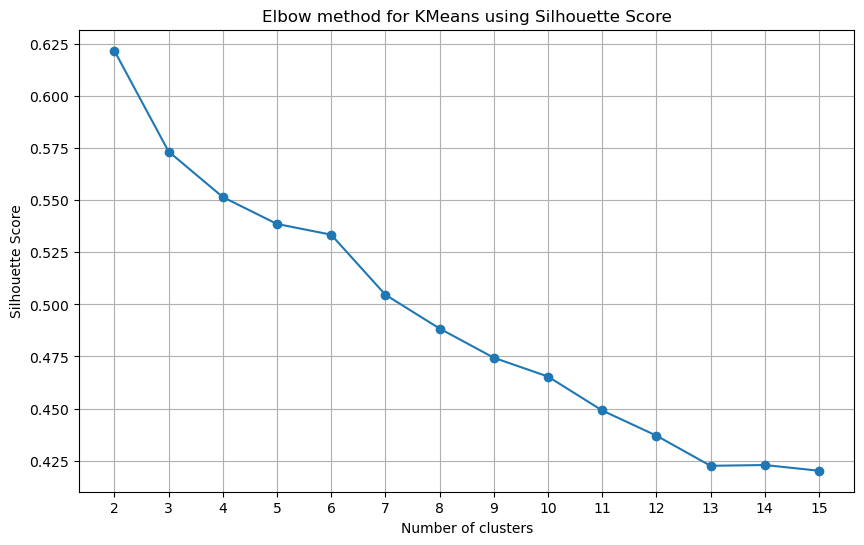

In [19]:
# silhouette score calculation

silhouette_scores = []
cluster_range = range(2, 16)

for n in cluster_range:
    kmeans = KMeans(n_clusters = n, random_state=42, n_init='auto')
    kmeans_labels = kmeans.fit_predict(happy_wrld)
    silhouette_scores.append(silhouette_score(happy_wrld, kmeans_labels))

# plot the scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')  # Plot all silhouette scores
plt.title('Elbow method for KMeans using Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 16, step=1))  # Adjust ticks for better visualization
plt.grid(True)
plt.show()

In [20]:
# Find the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 as we started from 2 clusters
print("Optimal number of clusters:", optimal_clusters)

# KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(happy_wrld)

# Silhouette score for KMeans
kmeans_score = silhouette_score(happy_wrld, kmeans_labels)
print("KMeans Silhouette score:", kmeans_score)

Optimal number of clusters: 2
KMeans Silhouette score: 0.6218129503319967


In [34]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=5)
pca_data = pca.fit_transform(happy_wrld)

# Create a DataFrame for the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df

,PC1,PC2,PC3,PC4,PC5
0,82.842107,3.709253,1.965881,0.168894,0.503594
1,82.838568,2.810397,1.935308,-0.190456,0.213800
2,82.840679,2.683624,1.686341,0.174690,0.733545
3,82.840811,3.353117,1.674395,0.077471,0.706734
4,82.839200,2.949749,2.244978,0.051717,-0.002220
...,...,...,...,...,...
1944,-82.164039,1.774527,0.885174,-1.085109,0.544437
1945,-82.163734,1.641784,1.071263,-1.054595,0.156157
1946,-82.163956,1.889023,0.688262,-1.070323,0.056504
1947,-82.162536,2.641008,0.519095,-0.950414,0.110623


In [35]:
# using PCA now...

# KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

# Silhouette score for KMeans
kmeans_score = silhouette_score(pca_data, kmeans_labels)
print("KMeans Silhouette score:", kmeans_score)

KMeans Silhouette score: 0.6230230632746865


### Agglomerative Clustering

In [36]:
# Agglomerative Clustering with optimal number of clusters
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)
agglomerative_labels = agglomerative.fit_predict(pca_data)


# Silhouette score for Agglomerative Clustering
agglomerative_score = silhouette_score(pca_data, agglomerative_labels)
print("Agglomerative Clustering Silhouette score:", agglomerative_score)


Agglomerative Clustering Silhouette score: 0.60071494940648
